In this assignment you will use the [pgmpy](http://pgmpy.org/) library to study Bayesian networks and perform inference on them. The library provides the infrastructure to create or import many well-known networks in the [bnlearn](https://www.bnlearn.com/bnrepository/) repository. Specifically, we will be looking at the birth asphyxia [model](https://www.bnlearn.com/bnrepository/discrete-medium.html#child), which describes the relationships between birth asphyxia, complications, symptoms, and diagnoses. 

First, run the following cell to locally install pgmpy and import any necessary functionalities.

In [ ]:
!pip install pgmpy
from pgmpy.utils import get_example_model
child_model = get_example_model('child')
NODES = ['BirthAsphyxia', 'Disease', 'Sick', 'DuctFlow', 'CardiacMixing', 
         'LungParench', 'LungFlow', 'LVH', 'Age', 'Grunting', 'HypDistrib',
         'HypoxiaInO2', 'CO2', 'ChestXray', 'LVHreport', 'GruntingReport',
         'LowerBodyO2', 'RUQO2', 'CO2Report', 'XrayReport']

     |████████████████████████████████| 327kB 8.8MB/s 


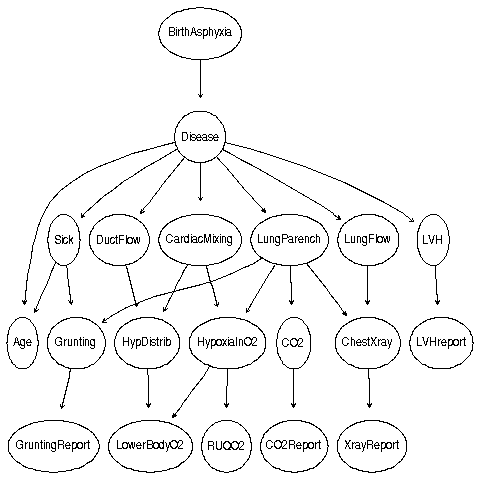

# Problem 1: Independence (20 points)

pgmpy contains several functions for testing independences, which are demonstrated in "Step 4" of this [notebook](https://github.com/pgmpy/pgmpy/blob/dev/examples/Creating%20a%20Discrete%20Bayesian%20Network.ipynb).
Answer the following questions about the independence properties of the birth asphyxia network. You are encouraged, but not required, to use the independence-checking functions of pgmpy to verify your answers. If you choose to do so, please leave all commands and outputs that you use in the code cell below your responses.

1. Name all pairs of independent variables given no observed evidence in the Bayes net. If no variables are independent, briefly explain why that is the case.
2. List all variable pairs (X, Y) for which "X is conditionally independent of all other 18 variables in the Bayes net, given Y". For example, ('BirthAsphyxia', 'Disease') is such a pair.
3.  Suppose 'Disease' is observed. List all variables that are *not* guaranteed to be independent of 'Age'. Briefly explain how you know that the remaining variables are guaranteed independent. 
4.  Suppose 'Disease' is observed. Name a second variable that, if observed, would cause 'Age' to lose at least one guarantee of independence. Briefly explain why they change the independence properties.


ENTER YOUR RESPONSES HERE

1.  No variables are independent. \\
    Explanation: \\
    Two nodes are d-connected (dependent) if there is an unblocked path between them. By a path we mean any consecutive sequence of edges, disregarding their directionalities. By "unblocked path" we mean a path that does not contain any collidor. Since there is no observed evidence, the only possible collidor is the third case among the three collior scenarios discussed in lecture note (i.e., the child which is connected to two parents). However, in this model, whenever two nodes have a common child (i.e., meet a collidor in a path between them) there is another unblocked path. So no variables are independent.

2. (LVHreport, LVH), (GruntingReport, Grunting), (CO2Report, CO2), (XrayReport , ChestXray), (BirthAsphyxia, Disease), (RUQO2, HypoxiaInO2)

3.  Sick, Grunting, GruntingReport \\
    Explanation: \\
    Since 'Disease' is observed, so it becomes a collidor in some paths. For any nodes whose only unblocked path to 'Age' goes through 'Disease', they are now independent with 'Age'. 'Sick', 'Grunting', 'GruntingReport' are the only three nodes that have another unblocked path to 'Age' ('Age' <- 'Sick' ->'Grunting' -> 'GruntingReport').
4.  Grunting, GruntingReport \\
    Explanation: \\
    If 'Age' will lose at least one guarantee of independence, it means that some collidor will be removed after the second variable is observed. The only possible case is the last two among the four no-collior scenarios discussed in lecture note. So, if 'Grunting' or 'GruntingReport' is observed, there is a new unblocked path for 'LungParench'.
    

In [ ]:
# ENTER ANY CODE YOU USE TO HELP ANSWER THE ABOVE QUESTIONS HERE
print("1.")
print("total nodes:", len(NODES))
for v in NODES:
  atn = child_model.active_trail_nodes(v)[v]
  print(v, len(atn))

print("2.")
for v in NODES:
  for w in NODES:
    if w == v:
      continue
    valid = True
    for x in NODES:
      if x == v or x == w:
        continue
      if child_model.is_active_trail(v, x, observed=[w]):
        valid = False
        break
    if valid == True:
      print(v,w)


print("3.")
for v in NODES:
  if v == "Disease" or v == "Age":
      continue
  if child_model.is_active_trail("Age", v, observed=["Disease"]):
      print(v)


print("4.")
for v in NODES:
  # print("-----", v)
  if v == "Disease" or v == "Age":
      continue
  count = 0
  for w in NODES:
    if w == "Disease" or w == "Age":
      continue
    if child_model.is_active_trail("Age", w, observed=["Disease", v]):
      # print("     ", w)
      count += 1
  if count > 3:
    print(v)

1.
total nodes: 20
BirthAsphyxia 20
Disease 20
Sick 20
DuctFlow 20
CardiacMixing 20
LungParench 20
LungFlow 20
LVH 20
Age 20
Grunting 20
HypDistrib 20
HypoxiaInO2 20
CO2 20
ChestXray 20
LVHreport 20
GruntingReport 20
LowerBodyO2 20
RUQO2 20
CO2Report 20
XrayReport 20
2.
BirthAsphyxia Disease
LVHreport LVH
GruntingReport Grunting
RUQO2 HypoxiaInO2
CO2Report CO2
XrayReport ChestXray
3.
Sick
Grunting
GruntingReport
4.
Grunting
GruntingReport


In addition to its structure, the Bayes net model also specifies the parameters (probabilities). These conditional probability distributions, or CPDs, are stored as tables. Each column corresponds to the CPD of the variable of interest given a combination of its parents' values. 

For example, take the second table in the output below, the CPD for 'Disease'. The first column is the distribution $\Pr(Disease \mid BirthAsphyxia=yes)$ (which sums to 1). The first row is the "distribution" $\Pr(Disease=PFC \mid BirthAsphyxia)$ (which does not sum to 1).

The tables can be accessed as follows (you will be using all these tables in the following problem):

In [ ]:
print(child_model.get_cpds('BirthAsphyxia'))
print("")
print(child_model.get_cpds('Disease'))
print("")
print(child_model.get_cpds('Sick'))
print("")
print(child_model.get_cpds('LungParench'))
print("")
print(child_model.get_cpds('Grunting'))
print("")
print(child_model.get_cpds('GruntingReport'))

+--------------------+-----+
| BirthAsphyxia(yes) | 0.1 |
+--------------------+-----+
| BirthAsphyxia(no)  | 0.9 |
+--------------------+-----+

+-----------------+--------------------+-------------------+
| BirthAsphyxia   | BirthAsphyxia(yes) | BirthAsphyxia(no) |
+-----------------+--------------------+-------------------+
| Disease(PFC)    | 0.2                | 0.03061224        |
+-----------------+--------------------+-------------------+
| Disease(TGA)    | 0.3                | 0.33673469        |
+-----------------+--------------------+-------------------+
| Disease(Fallot) | 0.25               | 0.29591837        |
+-----------------+--------------------+-------------------+
| Disease(PAIVS)  | 0.15               | 0.23469388        |
+-----------------+--------------------+-------------------+
| Disease(TAPVD)  | 0.05               | 0.05102041        |
+-----------------+--------------------+-------------------+
| Disease(Lung)   | 0.05               | 0.05102041        |


# Problem 2: Exact Inference (30 points)

For these questions, write the analytical expression for each of the queries in terms of the CPD parameters. You can take advantage of normalization to simplify these expressions. Then plug in the parameters from the model to compute the requested values. (Note that pgmpy does contain functionality for performing inference, as shown in Section 4 of this [notebook](https://github.com/pgmpy/pgmpy_notebook/blob/master/notebooks/2.%20Bayesian%20Networks.ipynb). While you can use this to check your solution, we are looking for the correct analytical expressions used to derive it.)

**Note**: Please be precise with RV notation. Upper-case RVs should only refer to the queried distribution, while lower-case RVs should refer to either observed RVs or dummy RVs being summed over.

1.   Compute the distribution $\Pr(Sick \mid BirthAsphyxia = yes)$. For compactness, you can write $\Pr(S \mid ba)$.
2.   Compute the distribution $\Pr(Grunting \mid Disease = PFC, Sick = yes)$. For compactness, you can write $\Pr(G \mid d, s)$.
3.   Compute the distribution $\Pr(GruntingReport \mid Disease = PFC, Sick = yes)$. For compactness, you can write $\Pr(GR \mid d, s)$. Briefly explain why these probabilities are not identical to those of the previous part. (Hint: Can you start from your result from the previous part?)

ENTER YOUR SOLUTIONS HERE

1.   $\Pr(S \mid ba) = \frac{\Pr(S,\ ba)}{\Pr(ba)} = \frac{\sum_d\Pr(ba)\Pr(d|ba)\Pr(S|d)}{\Pr(ba)} = \frac{\Pr(ba)\sum_d\Pr(d|ba)\Pr(S|d)}{\Pr(ba)}$ \\
     = (0.2\*0.4+0.3\*0.3+0.25\*0.2+0.15\*0.3+0.05\*0.7+0.05\*0.7, 0.2\*0.6+0.3\*0.7+0.25\*0.8+0.15\*0.7+0.05\*0.3+0.05\*0.3) \\
     = (0.335, 0.665)

2.   $\Pr(G \mid d, s)  = \frac{\Pr(G,\ d,\ s)}{\Pr(d,\ s)} = \frac{\sum_{lp}\Pr(d)\Pr(lp | d)\Pr(s \mid d) \Pr(G \mid s, lp)}{\Pr(d)\Pr(s \mid d)} = \frac{\sum_{lp}\Pr(lp | d)\Pr(s \mid d) \Pr(G \mid s, lp)}{\Pr(s \mid d)} = \frac{\sum_{lp}\Pr(lp | d)\Pr(s \mid d) \Pr(G \mid s, lp)}{\Pr(s \mid d)} $ \\
     = (0.4, 0.6)

3.   $\Pr(GR \mid d, s)  = \frac{\Pr(GR,\ d,\ s)}{\Pr(d,\ s)} = \frac{\sum_{lp,g}\Pr(d)\Pr(lp | d)\Pr(s \mid d) \Pr(g \mid s, lp) \Pr(G \mid g)}{\Pr(d)\Pr(s \mid d)} = \frac{\sum_{lp}\Pr(lp | d)\Pr(s \mid d) \Pr(g \mid s, lp) \Pr(G \mid g)}{\Pr(s \mid d)} = \frac{\sum_{lp,g}\Pr(lp \mid d)\Pr(s \mid d) \Pr(G \mid s, lp)}{\Pr(s \mid d)} $ \\
     = (0.38, 0.62)

In [ ]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(child_model)
print(infer.query(['Sick'], evidence={'BirthAsphyxia': 'yes'}))
print(infer.query(['Grunting'], evidence={'Disease': 'PFC', 'Sick': 'yes'}))
print(infer.query(['GruntingReport'], evidence={'Disease': 'PFC', 'Sick': 'yes'}))

Eliminating: Age:   0%|          | 0/17 [00:00<?, ?it/s]        

+-----------+-------------+
| Sick      |   phi(Sick) |
+===========+=============+
| Sick(yes) |      0.3350 |
+-----------+-------------+
| Sick(no)  |      0.6650 |
+-----------+-------------+
+---------------+-----------------+
| Grunting      |   phi(Grunting) |
+===============+=================+
| Grunting(yes) |          0.4000 |
+---------------+-----------------+
| Grunting(no)  |          0.6000 |
+---------------+-----------------+


Eliminating: RUQO2: 100%|██████████| 17/17 [00:00<00:00, 221.50it/s]


+---------------------+-----------------------+
| GruntingReport      |   phi(GruntingReport) |
+=====================+=======================+
| GruntingReport(yes) |                0.3800 |
+---------------------+-----------------------+
| GruntingReport(no)  |                0.6200 |
+---------------------+-----------------------+


# Sampling Algorithms

While exact inference will always get us the right values, the amount of computation increases dramatically for larger Bayesian networks. Approximate inference via sampling is an alternative method. The ```prior_sample``` function below generates a sample for a pgmpy Bayes net in the manner of prior sampling. It samples values one node at a time, assuming that nodes are ordered such that no node occurs before its parents. We also define a ```prob_given_parents``` utility function to interface with the underlying pgmpy CPD structures.

(pgmpy also contains built-in sampling algorithms, but we will not be using them.)

In [ ]:
import numpy.random as npr

def prior_sample(model, nodes):
  """
  Generates and returns a single sample as a {variable: value} dictionary
  """
  sample = {}
  for n in nodes:
    cpd = model.get_cpds(n)
    values = (cpd.state_names)[n]
    probs = prob_given_parents(cpd, sample)
    sample[n] = npr.choice(values, p=probs)
  return sample


def prob_given_parents(cpd, sample):
  """
  Returns probability distribution of the node to which cpd corresponds, 
  conditioned on its parents' values in sample
  """
  factors = cpd.variables
  states = cpd.state_names 

  col = 0
  skip = 1
  for i in range(len(factors)-1):
    parent_var = factors[-i-1]
    parent_val = sample[parent_var]
    ind = states[parent_var].index(parent_val)
    col += ind*skip
    skip *= len(states[parent_var])

  return (cpd.get_values())[:,col]  

## Coding 1 (15 points)

Prior sampling does not take into account evidence variables, so we can implement a rejection sampling function that uses ```prior_sample```, followed by a check for consistency with provided evidence. The function below takes in the problem ```model``` and list of ```nodes``` (to be passed into ```prior_sample```), a query variable, the number of samples to attempt, and a dictionary of evidence variables and values. The estimated distribution of the query variable (also a dictionary) and the number of consistent samples generated should then be returned.

In [ ]:
def rejection_sample(model, nodes, N, query, evidence={}):
  """
  INPUTS: Problem model, nodes, total number of samples to try (including 
  inconsistent ones), query variable, and a {variable: value} evidence dict
  OUTPUTS: dist, a dictionary providing the estimated distribution for query
           num_consistent, number of consistent samples generated
  """
  dist = {val:0 for val in model.get_cpds(query).state_names[query]}

  # YOUR CODE HERE

  num_samples = 0
  for i in range(N):
    sample = prior_sample(model, nodes) 
    valid = True
    for node in evidence:
      if node in sample and evidence[node] != sample[node]:
        valid = False
        break
    if valid:
      num_samples += 1
      v = sample[query]
      dist[v] += 1
        
  for k in dist:
     dist[k] /= num_samples  
  

  return dist , num_samples


In [ ]:
dist, num_samples = rejection_sample(child_model, NODES, 20000, 'XrayReport', evidence={'BirthAsphyxia':'yes'})
print("XrayReport given BirthAsphyxia = yes: ", dist)
print("Number of consistent samples: ", num_samples)

XrayReport given BirthAsphyxia = yes:  {'Normal': 0.2621452621452621, 'Oligaemic': 0.29389129389129387, 'Plethoric': 0.18181818181818182, 'Grd_Glass': 0.08946608946608947, 'Asy/Patchy': 0.17267917267917268}
Number of consistent samples:  2079


In [ ]:
true_pr = {'Normal': 0.2507, 'Oligaemic': 0.2885, 'Plethoric': 0.2069, 'Grd_Glass': 0.0867, 'Asy/Patchy': 0.1672}
diffs = {v: (true_pr[v]-dist.get(v, 0))/true_pr[v] for v in true_pr}
print("Percentage difference: ", diffs)
print("Avg percentage difference: ", sum(diffs.values())/5)

Percentage difference:  {'Normal': -0.04565321956626306, 'Oligaemic': -0.018687327179528222, 'Plethoric': 0.12122676743266397, 'Grd_Glass': -0.03190414609099737, 'Asy/Patchy': -0.03277017152615248}
Avg percentage difference:  -0.0015576193860554338


In [ ]:
dist, num_samples = rejection_sample(child_model, NODES, 1000, 'XrayReport', evidence={'BirthAsphyxia':'yes'})
diffs = {v: (true_pr[v]-dist.get(v, 0))/true_pr[v] for v in true_pr}
print("----- 1000 requested samples -----")
print("XrayReport given BirthAsphyxia = yes: ", dist)
print("Number of consistent samples: ", num_samples)
print("Percentage difference: ", diffs)
print("Avg percentage difference: ", sum(diffs.values())/5)

----- 1000 requested samples -----
XrayReport given BirthAsphyxia = yes:  {'Normal': 0.22429906542056074, 'Oligaemic': 0.32710280373831774, 'Plethoric': 0.1308411214953271, 'Grd_Glass': 0.08411214953271028, 'Asy/Patchy': 0.2336448598130841}
Number of consistent samples:  107
Percentage difference:  {'Normal': 0.10530887347203524, 'Oligaemic': -0.13380521226453296, 'Plethoric': 0.36761178590948723, 'Grd_Glass': 0.029848332956052173, 'Asy/Patchy': -0.3973974869203596}
Avg percentage difference:  -0.0056867413694635886


## Response 1 (10 points)

Running the above cell will estimate the distribution of 'XrayReport' given 'BirthAsphyxia' = 'yes' by requesting 20000 samples. If you implemented rejection sampling correctly, the estimated distribution should be on average within about 5% of the true distribution: ```{'Normal': 0.2507, 'Oligaemic': 0.2885, 'Plethoric': 0.2069, 'GrdGlass': 0.0867, 'Asy/Patchy': 0.1672}```

1.  How many samples were actually consistent with the evidence and usable? Which probability does the fraction of consistent samples correspond to?

2.  What happens to the estimated distribution when we request fewer samples? Give an average percentage difference between the estimated and true distribution for 1000 requested samples (show the code output above).

ENTER YOUR RESPONSES HERE

1. Only 2079 samples are actually consistent with the evidence and usable. This fraction is corresponding to the probability of a sample being consistent with 'BirthAsphyxia' = 'yes' among all the 20000 samples. In other words, it is $\Pr(BirthAsphyxia = yes) = 0.1$.

2. The usable samples are also much less, leading to a less accurate estimation. Avg percentage difference is 0.0057.

## Coding 2 (15 points)

Rejection sampling can end up rejecting a large number of samples, wasting effort. Another sampling method is likelihood weighting, which guarantees that every sample is consistent and associates with each a weight. In the cell below we've partially implemented ```weighted_sample```, which generates a sample consistent with ```evidence```, along with the corresponding weight for that sample.

First complete ```weighted_sample``` to correctly update the weight ```w``` whenever an evidence variable is assigned to a sample.

Then complete ```likelihood_weighting```, which should be very similar to ```rejection_sample``` but without the consistency check. It should compute and return a distribution for ```query``` based on the weights returned by ```weighted_sample```.

In [ ]:
def weighted_sample(model, nodes, evidence):
  """
  Generate a sample consistent with evidence, along with corresponding weight
  """
  w = 1
  sample = {}
  for n in nodes:
    cpd = model.get_cpds(n)
    values = (cpd.state_names)[n]
    if n in evidence:
      # YOUR CODE HERE
      sample[n] = evidence[n]      
      probs = prob_given_parents(cpd, sample)      
      i = values.index(sample[n])
      w *= probs[i]

    else:
      probs = prob_given_parents(cpd, sample)
      sample[n] = npr.choice(values, p=probs)
  return sample, w


def likelihood_weighting(model, nodes, N, query, evidence={}):
  """
  INPUTS: Problem model, nodes, query variable, number of samples, 
          and a {variable: value} evidence dict
  OUTPUT: dist, a dictionary providing the estimated distribution for query
  """
  dist = {val:0 for val in model.get_cpds(query).state_names[query]}

  # YOUR CODE HERE
  for i in range(N):
    sample, w = weighted_sample(model, nodes, evidence)
    v = sample[query]
    dist[v] += w
  
  total_w = sum(dist.values())
  for k in dist:
     dist[k] /= total_w  

  return dist


In [ ]:
dist = likelihood_weighting(child_model, NODES, 380, 'XrayReport', evidence={'BirthAsphyxia':'yes'})
print("XrayReport given BirthAsphyxia = yes: ", dist)

# CHANGE THE NUMBER OF SAMPLES BELOW
dist = likelihood_weighting(child_model, NODES, 380, 'Disease', evidence={'GruntingReport':'yes', 'LowerBodyO2':'<5', 'RUQO2':'<5', 'CO2Report':'<7.5', 'XrayReport':'Oligaemic'})
print("Disease given reported evidence: ", dist)

XrayReport given BirthAsphyxia = yes:  {'Normal': 0.2815789473684209, 'Oligaemic': 0.27368421052631564, 'Plethoric': 0.22105263157894733, 'Grd_Glass': 0.07894736842105278, 'Asy/Patchy': 0.14473684210526327}
Disease given reported evidence:  {'PFC': 0.022259053069473365, 'TGA': 0.15520070450800122, 'Fallot': 0.3537779949853383, 'PAIVS': 0.4223624627559863, 'TAPVD': 0.005169303849767919, 'Lung': 0.04123048083143276}


In [ ]:
for n in range (300, 400, 10):
  count = 0
  for i in range(20):
    dist = likelihood_weighting(child_model, NODES, n, 'XrayReport', evidence={'BirthAsphyxia':'yes'})
    diffs = {v: (true_pr[v]-dist[v])/true_pr[v] for v in true_pr}
    if abs(sum(diffs.values())/5) <= 0.05:
      count += 1
  print(n, count)

300 18
310 20
320 19
330 19
340 20
350 18
360 19
370 19
380 20
390 20


## Response 2 (10 points)

1.  To estimate the distribution of 'XrayReport' given 'BirthAsphyxia', we again request 20000 samples. However, you can try a smaller number of samples. What is the smallest number of samples to be sufficient for the estimate to be within 5% of the true distribution (show the code output above)? Comment on the efficiency of samples needed for likelihood weighting vs rejection sampling.

2.  Likelihood weighting suffers when we have too many evidence variables or when the evidence specified is not common enough. For example, what happens when you query 'Disease' with ```evidence={'GruntingReport':'yes', 'LowerBodyO2':'<5', 'RUQO2':'<5', 'CO2Report':'<7.5', 'XrayReport':'Oligaemic'}``` using the same number of samples you found to be sufficient for the previous part? Explain your findings.

For reference, the true conditional distribution of 'Disease' is ```{'PFC': 0.0426, 'TGA': 0.2099, 'Fallot': 0.3620, 'PAIVS': 0.3226, 'TAPVD': 0.0350, 'Lung': 0.0278}```.


ENTER YOUR RESPONSES HERE

1.  I have write a script to find the estimated lower bound. I found that if we choose 380 as the requested sample size, the resulted estimation can always be within 5% of the true distribution (I tried 20 times for each sample size and the outputs are shown above). Lkelihood weighting is more efficient than rejection sampling, since all the samples generated are usable, so we need much less samples.

2.  The result becomes very inaccurate. The reason is that Likelihood weighting has a drawback: evidence only influences samples for downstream variables, but not upstream ones (in our case, we are not more likely to sample a good value
for 'Disease' that matches the evidences, if the evidences are too specific to be common emough).